# Using Classification to Predict a Stroke

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'brain_stroke.xlsx'

df = pd.read_excel(path)

df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df['age'] = df['age'].astype(int) # changing data type of age column to integer from float

# getting dummy variables for categorical data then using concatenation to put together the dataframes

df = pd.concat([pd.get_dummies(df['gender']), df], axis=1) # axis = 1 means joinin dataframes side by side instead of on top

df = pd.concat([pd.get_dummies(df['ever_married']), df], axis=1)

df = pd.concat([pd.get_dummies(df['work_type']), df], axis=1)

df = pd.concat([pd.get_dummies(df['Residence_type']), df], axis=1)

df = pd.concat([pd.get_dummies(df['smoking_status']), df], axis=1)

# removing artefact columns

df.drop(columns=['ever_married', 'work_type', 'Residence_type', 'smoking_status', 'gender'], inplace=True)

In [5]:
df

Unknown  formerly smoked  never smoked  smokes  Rural  Urban  Govt_job  \
0           0                1             0       0      0      1         0   
1           0                0             1       0      1      0         0   
2           0                0             0       1      0      1         0   
3           0                0             1       0      1      0         0   
4           0                1             0       0      0      1         0   
...       ...              ...           ...     ...    ...    ...       ...   
4976        0                1             0       0      1      0         0   
4977        0                0             0       1      0      1         0   
4978        0                0             0       1      1      0         1   
4979        0                0             0       1      1      0         0   
4980        0                0             1       0      0      1         0   

      Private  Self-employed  children  No  Yes  Female  Male  age  \
0           1              0         0   0    1       0     1   67   
1           1              0         0   0    1       0     1   80   
2           1              0         0   0    1       1     0   49   
3           0              1         0   0    1       1     0   79   
4           1              0         0   0    1       0     1   81   
...       ...            ...       ...  ..  ...     ...   ...  ...   
4976        1              0         0   1    0       0     1   41   
4977        1              0         0   0    1       0     1   40   
4978        0              0         0   0    1       1     0   45   
4979        1              0         0   0    1       0     1   40   
4980        1              0         0   0    1       1     0   80   

      hypertension  heart_disease  avg_glucose_level   bmi  stroke  
0                0              1             228.69  36.6       1  
1                0              1             105.92  32.5       1  
2                0              0             171.23  34.4       1  
3                1              0             174.12  24.0       1  
4                0              0             186.21  29.0       1  
...            ...            ...                ...   ...     ...  
4976             0              0              70.15  29.8       0  
4977             0              0             191.15  31.1       0  
4978             1              0              95.02  31.8       0  
4979             0              0              83.94  30.0       0  
4980             1              0              83.75  29.1       0  

[4981 rows x 20 columns]

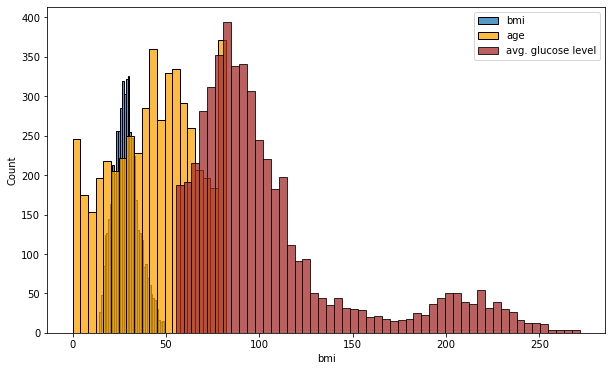

In [6]:
# checking distributions of numerical data

plt.figure(figsize=(10,6))

sns.histplot(data=df, x='bmi', legend=True)
sns.histplot(data=df, x='age', color='orange', legend=True)
sns.histplot(data=df, x='avg_glucose_level', color='brown', legend=True)
plt.legend(['bmi', 'age', 'avg. glucose level'])

plt.savefig('bef_standard.png')

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # creating an instance of StandardScaler to standardise numeric values

df['bmi'] = scaler.fit_transform(df['bmi'].values.reshape(-1,1))
df['avg_glucose_level'] = scaler.fit_transform(df['avg_glucose_level'].values.reshape(-1,1))
df['age'] = scaler.fit_transform(df['age'].values.reshape(-1,1))

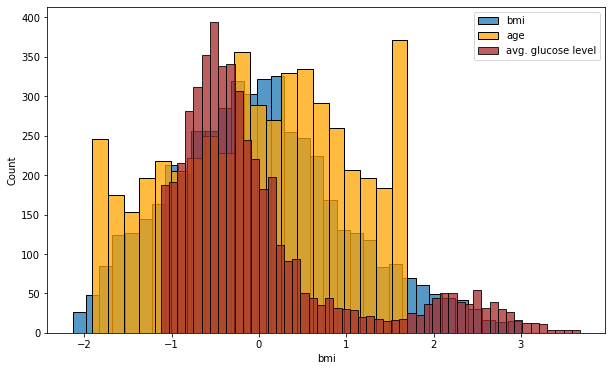

In [8]:
# checking distribtutions of numerical data after standardisation

plt.figure(figsize=(10,6))

sns.histplot(data=df, x='bmi', legend=True)
sns.histplot(data=df, x='age', color='orange', legend=True)
sns.histplot(data=df, x='avg_glucose_level', color='brown', legend=True)

plt.legend(['bmi', 'age', 'avg. glucose level'])

plt.savefig('aft_standard.png')

In [9]:
df

Unknown  formerly smoked  never smoked  smokes  Rural  Urban  Govt_job  \
0           0                1             0       0      0      1         0   
1           0                0             1       0      1      0         0   
2           0                0             0       1      0      1         0   
3           0                0             1       0      1      0         0   
4           0                1             0       0      0      1         0   
...       ...              ...           ...     ...    ...    ...       ...   
4976        0                1             0       0      1      0         0   
4977        0                0             0       1      0      1         0   
4978        0                0             0       1      1      0         1   
4979        0                0             0       1      1      0         0   
4980        0                0             1       0      0      1         0   

      Private  Self-employed  children  No  Yes  Female  Male       age  \
0           1              0         0   0    1       0     1  1.040111   
1           1              0         0   0    1       0     1  1.613261   
2           1              0         0   0    1       1     0  0.246518   
3           0              1         0   0    1       1     0  1.569172   
4           1              0         0   0    1       0     1  1.657349   
...       ...            ...       ...  ..  ...     ...   ...       ...   
4976        1              0         0   1    0       0     1 -0.106189   
4977        1              0         0   0    1       0     1 -0.150278   
4978        0              0         0   0    1       1     0  0.070164   
4979        1              0         0   0    1       0     1 -0.150278   
4980        1              0         0   0    1       1     0  1.613261   

      hypertension  heart_disease  avg_glucose_level       bmi  stroke  
0                0              1           2.723411  1.193238       1  
1                0              1          -0.000523  0.589390       1  
2                0              0           1.448529  0.869222       1  
3                1              0           1.512650 -0.662492       1  
4                0              0           1.780895  0.073909       1  
...            ...            ...                ...       ...     ...  
4976             0              0          -0.794162  0.191733       0  
4977             0              0           1.890500  0.383197       0  
4978             1              0          -0.242364  0.486294       0  
4979             0              0          -0.488199  0.221189       0  
4980             1              0          -0.492415  0.088637       0  

[4981 rows x 20 columns]

In [10]:
X = df.iloc[:, :-1].values # obtaining predictor variables
y = df.iloc[:, -1:].values # obtaining target variable (stroke)

In [11]:
X # displaying predictor variable values

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  2.72341090e+00,  1.19323816e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -5.22766599e-04,  5.89389611e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.44852918e+00,  8.69221866e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.42364234e-01,  4.86293516e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -4.88199415e-01,  2.21189274e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00, -4.92415000e-01,  8.86371531e-02]])

In [12]:
y # displaying target variable values

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting the data into train and test set

<AxesSubplot:xlabel='stroke', ylabel='Count'>

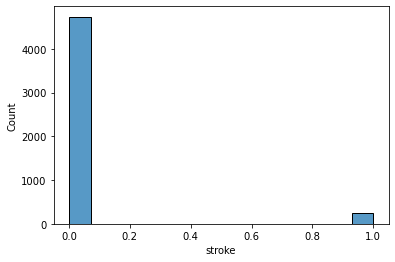

In [14]:
sns.histplot(data=df, x='stroke') # looking at target variable distribution

In [15]:
# there are far fewer values for 1 than 0 so I am going to oversample
# I don't want to undersample because there are too many good values for 0 and enough 1s to sample from

In [16]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))

[(0, 4733), (1, 4733)]


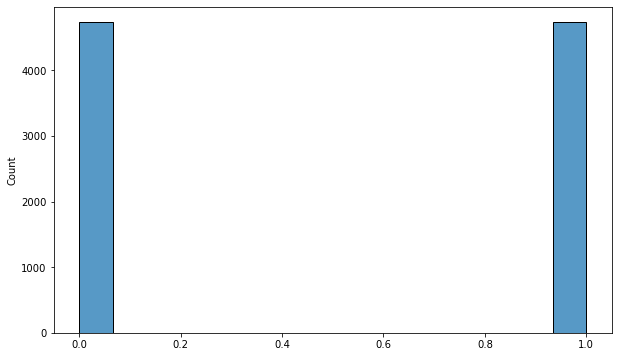

In [17]:
plt.figure(figsize=(10,6))

sns.histplot(x=y_resampled)

plt.savefig('oversampled.png')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# creating instance of KNN class with number of neighbours = sqrt(len(y_test)) and distance being measured using euclidean geometry

kn = KNeighborsClassifier(n_neighbors=int(sqrt(len(y_test))), metric='euclidean')

In [21]:
kn.fit(X_train, y_train) # training model using training set

KNeighborsClassifier(metric='euclidean', n_neighbors=43)

In [22]:
yhat = kn.predict(X_test) # storing prediction in a variable

In [23]:
confusion_matrix(y_test, yhat) # evaluating model using confusion matrix

array([[684, 262],
       [103, 845]], dtype=int64)

In [24]:
print(classification_report(y_test, yhat)) # evaluating model using f1 score

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       946
           1       0.76      0.89      0.82       948

    accuracy                           0.81      1894
   macro avg       0.82      0.81      0.81      1894
weighted avg       0.82      0.81      0.81      1894



In [25]:
# this is quite good, but I am still to draw the elbow diagram:

In [26]:
# calculating error rate and appending to list in order to plot an elbow diagram

error_rate = []

for k in range(1, 60): # looping through different values of K
    kn = KNeighborsClassifier(n_neighbors=int(k), metric='euclidean')
    kn.fit(X_train, y_train) # fitting data with different values of K
    yhat = kn.predict(X_test) # getting predictions based on different K values
    error_rate.append(1/np.mean(yhat != y_test)) # appending error rate to list
    

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

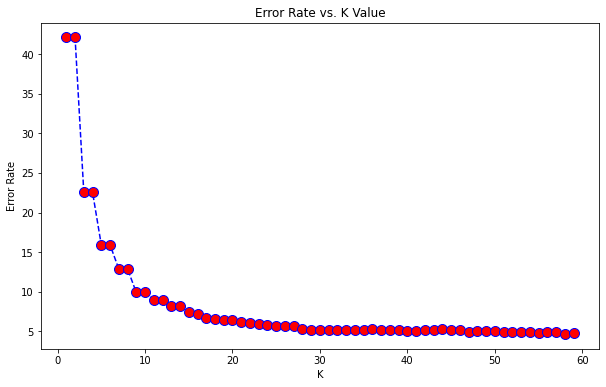

In [28]:
# plotting the elbow diagram to select optimal K value

plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.savefig('error_rate.png')

In [29]:
# ~20 seems to be optimal

In [30]:
# retrying classification using K = 20

k = 20 # setting k =20

kn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # making instance of KNN class

kn.fit(X_train, y_train) # training the KNN model

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [31]:
yhat_KNN_20 = kn.predict(X_test) # obtaining prediction using testing set and storing in variable

In [32]:
print(classification_report(y_test, yhat_KNN_20)) # evaluating model using f1 score

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       946
           1       0.77      0.97      0.86       948

    accuracy                           0.84      1894
   macro avg       0.87      0.84      0.84      1894
weighted avg       0.87      0.84      0.84      1894



## Using OverSampling

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
# splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

In [35]:
dtree = DecisionTreeClassifier() # creating class instance for Decision Tree
dtree.fit(X_train, y_train) # training the model using training set

DecisionTreeClassifier()

In [36]:
yhat_dtree = dtree.predict(X_test) # obtaining prediction using testing set and storing in variable

In [37]:
print(classification_report(y_test, yhat_dtree)) # evaluating model using f1 score

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       937
           1       0.96      1.00      0.98       957

    accuracy                           0.98      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894



### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=39)

In [40]:
ranf = RandomForestClassifier(n_jobs=-1, random_state=42) # instance being created with number of simultaneous runs = number of cores

In [41]:
ranf.fit(X_train, y_train) # training model using training set

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
yhat_ranf = ranf.predict(X_test) # obtaining prediction using testing set and storing in variable

In [43]:
print(classification_report(y_test, yhat_ranf)) # evaluating model using f1 score

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       966
           1       0.98      1.00      0.99       928

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894



## Using UnderSampling

### Decision Tree 

In [44]:
X = df.iloc[:, :-1].values # predictor variables
y = df.iloc[:, -1:].values # target variable

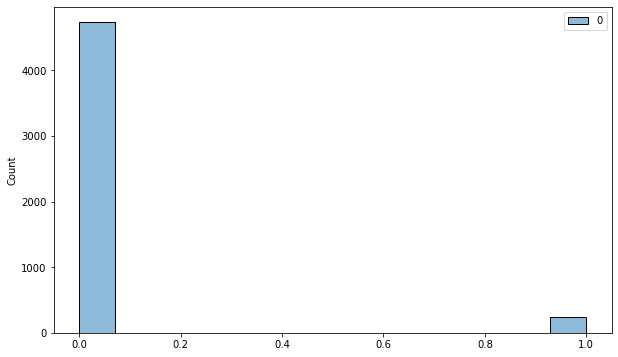

In [45]:
plt.figure(figsize=(10,6))

sns.histplot(y) # looking at 0 and 1 distributions for target variable

plt.savefig('target_distribution.png')

In [46]:
from imblearn.under_sampling import RandomUnderSampler

In [47]:
# removing data points from majority value in target variable

rus = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(sorted(Counter(y_undersampled).items()))

[(0, 248), (1, 248)]


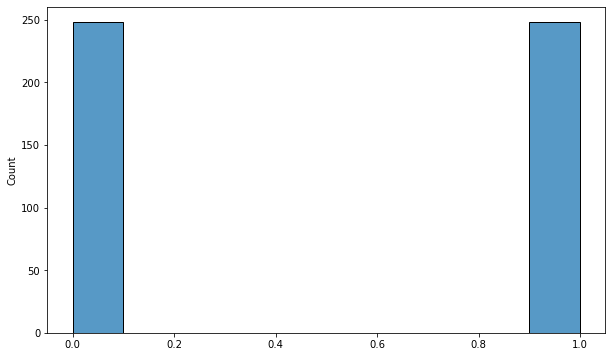

In [48]:
plt.figure(figsize=(10,6))

sns.histplot(x=y_undersampled) # checking distribution after resampling

plt.savefig('undersampled.png')

In [49]:
# splitting data into training and test sets using undersampled data

X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=35)

In [50]:
dtree_under = DecisionTreeClassifier() # creating class instance for Decision Tree
dtree_under.fit(X_train, y_train) # training model using training set

DecisionTreeClassifier()

In [51]:
yhat_dtree_under = dtree_under.predict(X_test) # obtaining prediction using testing set and storing in variable

In [52]:
print(classification_report(y_test, yhat_dtree_under)) # evaluating model using f1 score

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        57
           1       0.70      0.70      0.70        43

    accuracy                           0.74       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.74      0.74      0.74       100



### Random Forest 

In [53]:
ranf_under = RandomForestClassifier(n_jobs=-1, random_state=35) # creating class instance for random forest
ranf_under.fit(X_train, y_train) # training model using training set

RandomForestClassifier(n_jobs=-1, random_state=35)

In [54]:
yhat_ranf_under = ranf_under.predict(X_test) # obtaining prediction using testing set and storing in variable

In [55]:
print(classification_report(y_test, yhat_ranf_under)) # evaluating model using f1 score

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        57
           1       0.73      0.84      0.78        43

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

